### Findings

- Converting dates from "object" to "datetime" and saving them to home directory as CSV does not change anything. Reading in the dataset will still show "object" type. On the other hand, pickled files do preserve the "datetime" type.


- There are **275** brands, with half (**5232**) of all items having no brand, i.e. brand = `0`.


- There are **253** manufacturers, with no discernable pattern on the distribution of items.


- Items belong to three different categories with the variable names `category1`, `category2` and `category3`. The feature description document says these `category` columns are categorical and hierarchical attributes (not sure what that means), which might mean they are **ordinal** features.


- `category1` and `category2` has **8** labels from 1 to 8, while `category2` has 52 labels from 1 to 52.


- `recommendedRetailPrice_items` (the recommended retail price for a product, mostly provided by the manufacturer) is highly right-skewed, just like `simulationPrice_infos`. A log scale on the y-axis is an excellent way to visualize right-skewed data.


- The range of `recommendedRetailPrice` is from **2.46** to **6955**, with a mean **$\mu_{rrp} = 118.28$**.


- Out of all items, **7117** items had no `customerRatings` i.e. customer rating = `0`. Ratings are ranged from 1 to 5, with **2080** items having a rating of 5, **116** items having a rating of 1, and the rest are scattered in between. 


- The mean rating (excluding non-rated items) was quite high, at $\mu_{cr} = 4.41$.


- These ratings were all over the place, with values like 2.49 and 3.86, so an additional column was created to round them to half-integer values.



### Tasks 

- Saved `promo` data subsets as pickle files instead of CSVs.


- Completed univariate exploration of all variables in the `items` dataset, save for `itemID`.


- Added an additional column named `modifiedRating` to the `items` dataset, created as follows:
$$ mR = \frac{\text{round}(2 \times cR)}{2}, $$
where $mR$ is the `modifiedRating`, $cR$ is the `customerRating`, and `round` is the Python function for rounding to the nearest integer.


- The modified `items` dataset was saved to the home directory and the previous version was overwritten.



**Ismail Dawoodjee | 4:08 PM 29-May-2020**

# Data Exploration Part 2

This notebook will explore the `items` dataset. But I will first deal with the issue of datetime type features not being preserved after saving them as CSV.

In [8]:
%%time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'whitegrid')

Wall time: 1.94 ms


### Preserving datetime data type

- Checking if datetime type is preserved after saving as CSV.

In [17]:
promo1 = pd.read_csv('promo1.csv')
promo2 = pd.read_csv('promo2.csv')
promo3 = pd.read_csv('promo3.csv')

In [16]:
promo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           1653 non-null   int64  
 1   simulationPrice  1653 non-null   float64
 2   promotion        1653 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 38.9+ KB


In [18]:
promo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           157 non-null    int64  
 1   simulationPrice  157 non-null    float64
 2   promotion        157 non-null    object 
 3   promotion2       157 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.0+ KB


In [19]:
promo3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   itemID           33 non-null     int64  
 1   simulationPrice  33 non-null     float64
 2   promotion        33 non-null     object 
 3   promotion2       33 non-null     object 
 4   promotion3       33 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ KB


- Nope. Not preserved. Save them as pickle format instead, after conversion to datetime, and put the CSV files into a separate Junk folder. Then confirm that datetime type is preserved after reading it in.

In [ ]:
promo1.loc[:,'promotion'] = pd.to_datetime(promo1.loc[:,'promotion'], infer_datetime_format = True)

promo2.loc[:,'promotion'] = pd.to_datetime(promo2.loc[:,'promotion'], infer_datetime_format = True)
promo2.loc[:,'promotion2'] = pd.to_datetime(promo2.loc[:,'promotion2'], infer_datetime_format = True)

promo3.loc[:,'promotion'] = pd.to_datetime(promo3.loc[:,'promotion'], infer_datetime_format = True)
promo3.loc[:,'promotion2'] = pd.to_datetime(promo3.loc[:,'promotion2'], infer_datetime_format = True)
promo3.loc[:,'promotion3'] = pd.to_datetime(promo3.loc[:,'promotion3'], infer_datetime_format = True)

promo1.to_pickle('promo1.pkl')
promo2.to_pickle('promo2.pkl')
promo3.to_pickle('promo3.pkl')

In [28]:
promo3 = pd.read_pickle('promo3.pkl')

In [31]:
promo3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   itemID           33 non-null     int64         
 1   simulationPrice  33 non-null     float64       
 2   promotion        33 non-null     datetime64[ns]
 3   promotion2       33 non-null     datetime64[ns]
 4   promotion3       33 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1)
memory usage: 1.4 KB


### `Items` Dataset

- Explore the `items` dataset.

In [9]:
items = pd.read_pickle('items.pkl')

In [3]:
items.shape

(10463, 8)

In [4]:
items.columns

Index(['itemID', 'brand', 'manufacturer', 'customerRating', 'category1',
       'category2', 'category3', 'recommendedRetailPrice'],
      dtype='object')

In [5]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10463 entries, 0 to 10462
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   itemID                  10463 non-null  int64  
 1   brand                   10463 non-null  int64  
 2   manufacturer            10463 non-null  int64  
 3   customerRating          10463 non-null  float64
 4   category1               10463 non-null  int64  
 5   category2               10463 non-null  int64  
 6   category3               10463 non-null  int64  
 7   recommendedRetailPrice  10463 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 654.1 KB


In [6]:
items.describe()

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
count,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000,10463.000000
mean,5232.000000,56.108286,115.710982,1.408953,4.238077,22.506929,4.108573,118.283142
std,3020.552267,75.983983,77.269249,2.135633,2.530146,14.868889,2.534010,339.338973
min,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.460000
25%,2616.500000,0.000000,47.000000,0.000000,2.000000,8.000000,2.000000,13.950000
50%,5232.000000,0.000000,107.000000,0.000000,4.000000,23.000000,4.000000,24.220000
75%,7847.500000,101.000000,173.000000,4.000000,7.000000,38.000000,7.000000,67.920000
max,10463.000000,274.000000,253.000000,5.000000,8.000000,52.000000,8.000000,6955.000000


In [7]:
items

,itemID,brand,manufacturer,customerRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,1,1,1,8.84
1,2,0,2,3.00,1,2,1,16.92
2,3,0,3,5.00,1,3,1,15.89
3,4,0,2,4.44,1,2,1,40.17
4,5,0,2,2.33,1,1,1,17.04
...,...,...,...,...,...,...,...,...
10458,10459,180,253,0.00,8,44,8,56.57
10459,10460,0,253,0.00,8,44,8,163.81
10460,10461,0,253,0.00,8,44,8,128.01
10461,10462,180,253,0.00,8,44,8,166.97


### Variable `brand`

In [10]:
items['brand'].nunique()

275

In [11]:
items['brand'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [12]:
items['brand'].value_counts()

0      5232
101     242
82      198
93      161
116     125
       ... 
25        1
42        1
172       1
220       1
164       1
Name: brand, Length: 275, dtype: int64

In [27]:
(items['brand'].value_counts() == 1).sum()

56

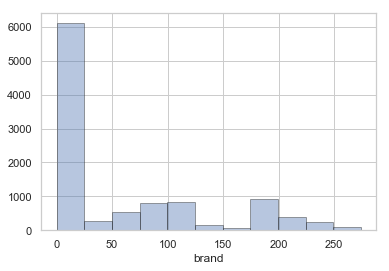

In [300]:
sns.distplot(items['brand'], kde = False, bins = 11, hist_kws = dict(edgecolor = "k"))

In [26]:
nonzero_brands = items[items['brand'] != 0]

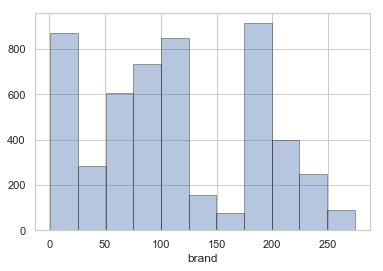

In [27]:
sns.distplot(nonzero_brands['brand'], kde = False, bins = 11, hist_kws = dict(edgecolor = "k"))

- There are **275** unique brands (`brand_items`), labelled from 0 to 274. 
- Out of 10463 items, **5232** items belong to the brand label `0`, which indicates they do not have a brand. All other brands have less than 250 items and 56 brands only have 1 item.

### Variable `manufacturer`

In [29]:
items['manufacturer'].nunique()

253

In [35]:
items['manufacturer'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [36]:
items['manufacturer'].value_counts()

86     481
159    448
164    348
2      343
121    266
      ... 
119      1
193      1
145      1
105      1
196      1
Name: manufacturer, Length: 253, dtype: int64

In [37]:
(items['manufacturer'].value_counts() == 1).sum()

27

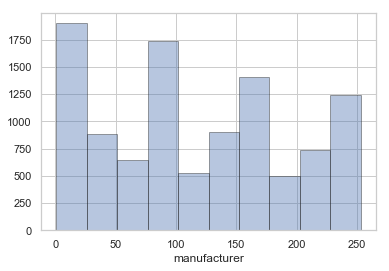

In [5]:
sns.distplot(items['manufacturer'], kde = False, bins = 10, hist_kws = dict(edgecolor = "k"))

- There are **253** unique manufacturers (`manufacturer_items`), labelled from 1 to 253.
- All manufacturers produced less than 500 items, and 27 manufacturers produced only 1 item.
- The items are more random and evenly distributed over manufacturers unlike the item distribution over brands, where 5232 items are from Brand 0.

### Variable `category1`

In [44]:
items['category1'].nunique()

8

In [45]:
items['category1'].value_counts()

2    2348
1    1823
8    1734
5    1679
7    1121
4     969
6     489
3     300
Name: category1, dtype: int64

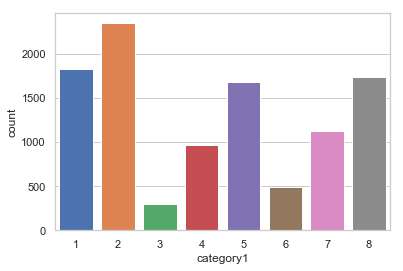

In [147]:
sns.countplot(x = items['category1'], saturation = 1)

- There are **8** unique labels for `category1_items`, from 1 to 8, with almost 2400 items belonging to Label 2 and 300 items belonging to Label 3.

### Variable `category2`

In [55]:
items['category2'].nunique()

52

In [58]:
items['category2'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52], dtype=int64)

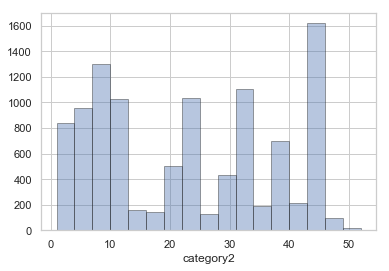

In [36]:
sns.distplot(items['category2'], kde = False, bins = 17, hist_kws = dict(edgecolor = "k"))

- There are **52** unique labels for `category2_items`, from 1 to 52. Like `category1`, the item distribution over `category2` appears to be random.

### Variable `category3`

In [115]:
items['category3'].nunique()

8

In [117]:
items['category3'].value_counts()

2    2400
1    1823
8    1735
4    1680
6    1018
7     957
3     646
5     204
Name: category3, dtype: int64

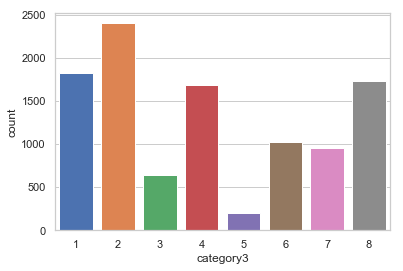

In [150]:
sns.countplot(items['category3'], saturation = 1)

- There are **8** unique labels for `category3_items`, from 1 to 8. 
- The distribution pattern appears similar to `category1`, except for the Labels 4, 5 and 6.

### Variable `customerRating`

In [155]:
items['customerRating'].nunique()

99

In [158]:
items['customerRating'].unique()

array([4.38, 3.  , 5.  , 4.44, 2.33, 4.2 , 4.  , 4.88, 3.33, 0.  , 4.83,
       3.71, 2.6 , 4.6 , 3.75, 1.  , 2.5 , 4.5 , 4.75, 4.89, 4.67, 4.33,
       4.8 , 3.67, 2.75, 1.5 , 3.4 , 3.5 , 4.25, 2.  , 4.4 , 2.67, 4.91,
       2.57, 3.24, 4.14, 2.13, 4.92, 4.43, 1.8 , 3.9 , 4.85, 2.83, 1.67,
       2.25, 2.06, 4.82, 4.7 , 4.97, 4.59, 4.41, 2.49, 3.25, 4.58, 2.93,
       4.28, 2.63, 3.57, 3.2 , 4.79, 4.13, 3.97, 4.57, 4.05, 4.47, 4.22,
       3.43, 3.14, 3.41, 4.63, 3.8 , 3.26, 4.36, 4.72, 4.86, 4.71, 4.11,
       4.76, 1.6 , 4.64, 3.86, 1.33, 3.6 , 4.69, 3.17, 4.17, 4.68, 2.04,
       4.77, 3.83, 4.93, 3.73, 4.42, 4.3 , 4.95, 3.27, 3.13, 4.9 , 3.88])

In [157]:
items['customerRating'].value_counts() 

0.00    7117
5.00    2080
4.00     301
3.00     186
4.50     116
        ... 
1.33       1
4.36       1
4.72       1
2.57       1
1.80       1
Name: customerRating, Length: 99, dtype: int64

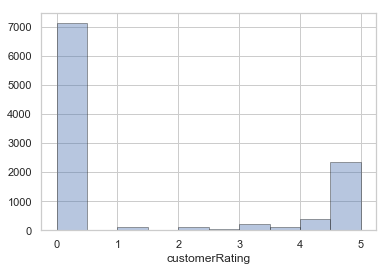

In [307]:
sns.distplot(items['customerRating'], kde = False, bins = 10, hist_kws = dict(edgecolor = "k"))

- There are two peaks in `customerRating` seen in the opposite extreme ends at ratings 0 and 5. 
- No rating (rating = `0`) is given to **7117** items while rating 5 is given to **2080** items. Other ratings are given to 301 or fewer items. A total of **3346** items were rated by customers.
- The ratings themselves appear to be continuous, where many ratings are given at a precision of 0.01, e.g. 4.72.
- These overly precise ratings are multiplied by 2, rounded to the nearest integer and divided by 2 to obtain 11 half-integer ratings from 0 to 5 (actually 10 half-integers because there are no 0.5 ratings). 

In [17]:
halfint = round(items['customerRating'] * 2) / 2

In [18]:
halfint.nunique()

10

In [19]:
halfint.value_counts()

0.0    7117
5.0    2153
4.0     362
4.5     247
3.0     208
1.0     116
2.0     104
3.5      96
2.5      43
1.5      17
Name: customerRating, dtype: int64

In [42]:
# there are no ratings between 0 and 1
less_than_1 = items['customerRating'].unique() <= 1
items['customerRating'].unique()[less_than_1]

array([0., 1.])

In [20]:
nonzero_ratings = halfint[halfint != 0]

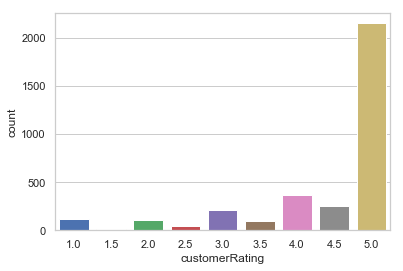

In [25]:
sns.countplot(nonzero_ratings, saturation = 1)

In [22]:
# mean of non-zero ratings
nonzero_ratings.mean()

4.405708308427974

In [49]:
items.insert(loc = 4, column = 'modifiedRating', value = halfint)

In [54]:
items.head()

,itemID,brand,manufacturer,customerRating,modifiedRating,category1,category2,category3,recommendedRetailPrice
0,1,0,1,4.38,4.5,1,1,1,8.84
1,2,0,2,3.00,3.0,1,2,1,16.92
2,3,0,3,5.00,5.0,1,3,1,15.89
3,4,0,2,4.44,4.5,1,2,1,40.17
4,5,0,2,2.33,2.5,1,1,1,17.04


- A sizeable chunk of rated items had a very good rating of 5 (2153 / 3346). The mean rating is quite high, at about 4.41.
- The half-integer column of ratings was added as a new column named `modifiedRating` into the `items` dataset.
- Save the modified dataset into the home directory, overwriting the old `items.pkl` dataset.

In [90]:
items.to_pickle('items.pkl')

### Variable `recommendedRetailPrice`

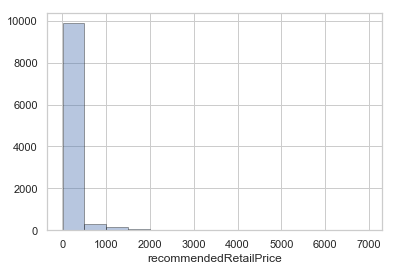

In [76]:
sns.distplot(items['recommendedRetailPrice'], kde = False, bins = 14, hist_kws = dict(edgecolor = "k"))

- The `recommendedRetailPrice` is highly right-skewed, so use a log scale on the y-axis to have an easier time looking at the distribution.

Text(0, 0.5, 'Frequency')

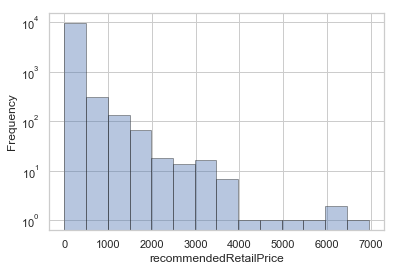

In [79]:
sns.distplot(items['recommendedRetailPrice'], kde = False,
             bins = 14, hist_kws = dict(edgecolor = "k"))
plt.yscale('log')
plt.ylabel('Frequency')

In [63]:
(items['recommendedRetailPrice'] < 100).sum(), (items['recommendedRetailPrice'] < 1000).sum()

(8416, 10197)

In [80]:
(items['recommendedRetailPrice'] > 4000).sum()

7

- Over 8400 items have a `recommendedRetailPrice` less than 100 and almost 10200 items have a `RetailPrice` less than 1000.
- The y-log plot also shows that there are only 7 items with a `RetailPrice` over 4000.

### Revisiting variable `simulationPrice` from `infos` dataset

- Want to replot `simulationPrice_infos` with y-log scale.

In [81]:
infos = pd.read_pickle('infos.pkl')

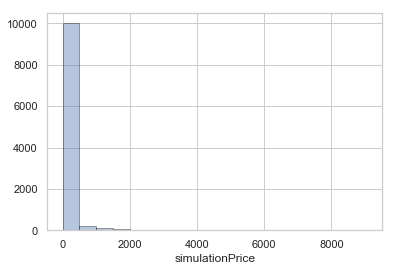

In [85]:
sns.distplot(infos['simulationPrice'], kde = False, bins = 18, hist_kws = dict(edgecolor = "k"))

Text(0, 0.5, 'Frequency')

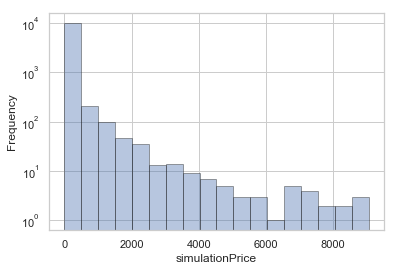

In [88]:
sns.distplot(infos['simulationPrice'], kde = False, bins = 18, hist_kws = dict(edgecolor = "k"))
plt.yscale('log')
plt.ylabel('Frequency')